# Unsupervised Machine Learning

In [223]:
# importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics as sm
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from scipy.cluster.hierarchy import dendrogram, linkage

In [224]:
# Reading csv files
women = pd.read_csv('temp_women.csv')
# women = pd.read_csv('athletes-women.csv')
men = pd.read_csv('temp_men.csv')
# men = pd.read_csv('athletes-men.csv')

In [225]:
df_women = women[['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]
X_w = scale(df_women)
# X_w[0:10,]

df_men = men[['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]
X_m = scale(df_men)
# X_m[0:10,]

## Location

### Elbow Method

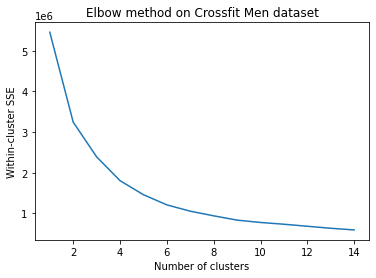

In [226]:
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men)
    distortations[k] = kmeans.inertia_
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Crossfit Men dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

### All Male Athletes

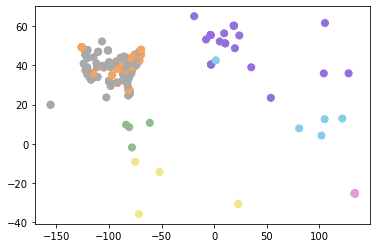

In [227]:
# Location men: All
df_men_all = men.loc[:,['rank','latitude','longitude']]
X_m_all = scale(df_men_all)

num_clusters = 7 #Define number of clusters
color_theme = np.array(['darkgray','plum', 'darkseagreen', 'sandybrown', 'skyblue', 'khaki', 'mediumpurple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen', 'teal'])

clustering = KMeans(n_clusters=num_clusters, random_state=3)
clustering.fit(X_m_all)
df_men_all['cluster_label'] = kmeans.fit_predict(df_men_all[df_men_all.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(df_men_all[df_men_all.columns[1:3]]) # Labels of each point
plt.scatter(x=df_men_all['longitude'],y=df_men_all['latitude'],c=color_theme[clustering.labels_],s=50)

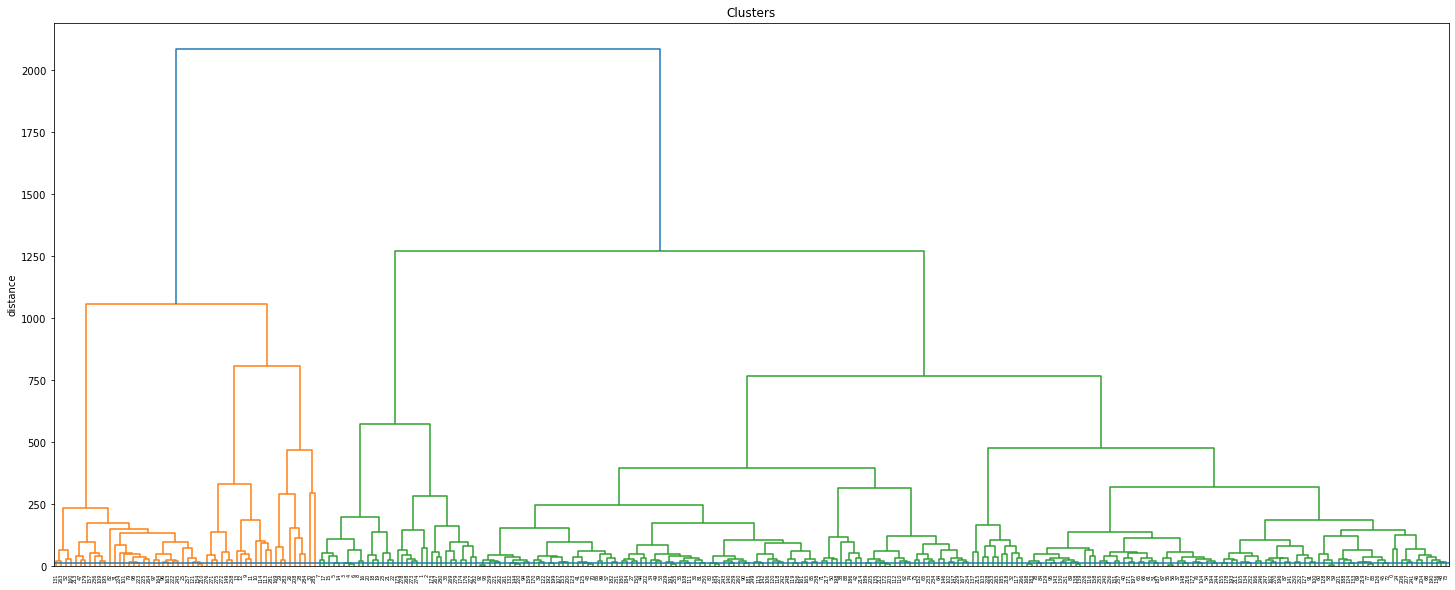

In [240]:
# Dendogram: All male athlete
Z = linkage(df_men,'ward')

plt.figure(figsize=(25,10))
plt.title('Clusters')
plt.ylabel('distance')
dendrogram(Z)

plt.axhline(y=15)
plt.show()

### Male Athletes - US Only

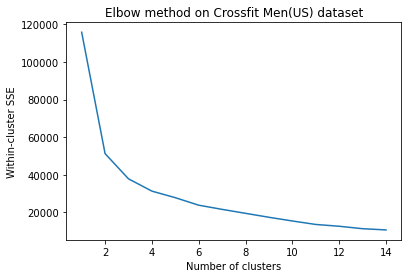

In [234]:
# Elbow method for male athletes from the US
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_us)
    distortations[k] = kmeans.inertia_
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Crossfit Men(US) dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

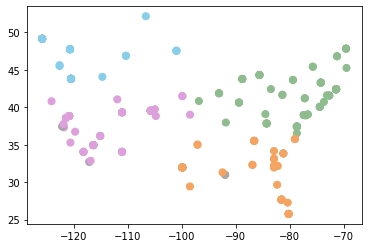

In [232]:
# location men us
mask = (df_men['longitude'] >= -135) & (df_men['longitude'] <= -60) & (df_men['latitude'] >= 25) & (df_men['latitude'] <= 60) 

l = df_men.loc[mask]

df_men_us=l.loc[:,['rank','latitude','longitude']]

X_m_us = scale(df_men_us)

num_clusters = 5

color_theme = np.array(['darkgray','plum', 'darkseagreen', 'sandybrown', 'skyblue', 'khaki', 'mediumpurple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen', 'teal'])

clustering = KMeans(n_clusters=num_clusters, random_state=5)

clustering.fit(X_m_us)

df_men_us['cluster_label'] = kmeans.fit_predict(df_men_us[df_men_us.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(df_men_us[df_men_us.columns[1:3]]) # Labels of each point


plt.scatter(x=df_men_us['longitude'],y=df_men_us['latitude'],c=color_theme[clustering.labels_],s=50)

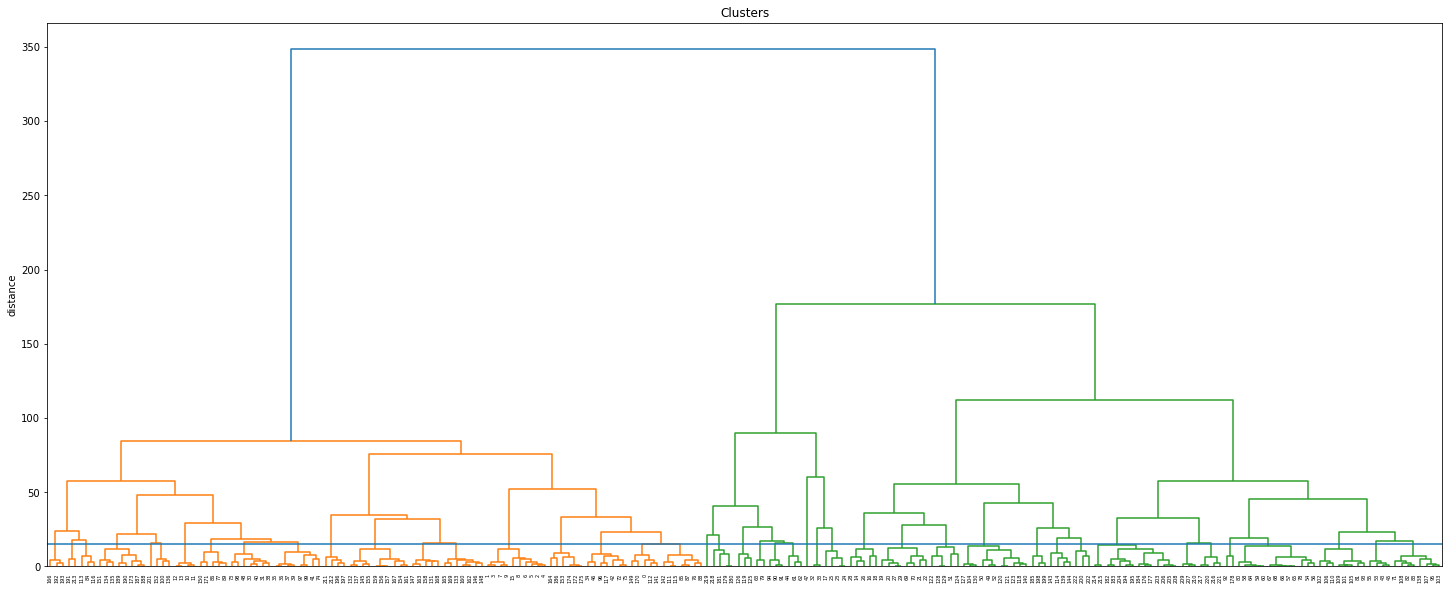

In [230]:
# Dendogram: Male athlete for US
Z = linkage(df_men_us,'ward')

plt.figure(figsize=(25,10))
plt.title('Clusters')
plt.ylabel('distance')
dendrogram(Z)

plt.axhline(y=15)
plt.show()

### All Female Athletes

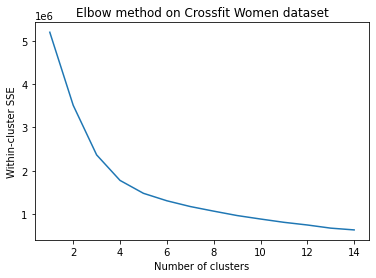

In [236]:
# Elbow method for female athletes 
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women)
    distortations[k] = kmeans.inertia_
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Crossfit Women dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

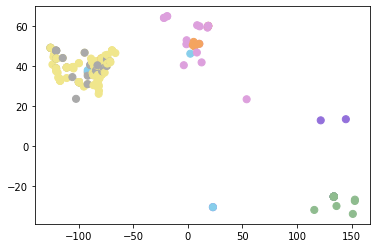

In [237]:
# Location women: All
df_women_all = df_women.loc[:,['rank','latitude','longitude']]
X_w_all = scale(df_women_all)

num_clusters = 7

color_theme = np.array(['darkgray','plum', 'darkseagreen', 'sandybrown', 'skyblue', 'khaki', 'mediumpurple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen', 'teal'])

clustering = KMeans(n_clusters=num_clusters, random_state=3)

clustering.fit(X_w_all)

df_women_all['cluster_label'] = kmeans.fit_predict(df_women_all[df_women_all.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(df_women_all[df_women_all.columns[1:3]]) # Labels of each point

df_women_all.head(10)

plt.scatter(x=df_women_all['longitude'],y=df_women_all['latitude'],c=color_theme[clustering.labels_],s=50)

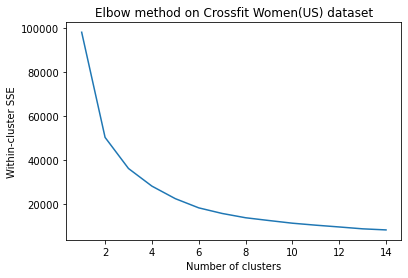

In [239]:
# Elbow method for female athletes from the US
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_women_us)
    distortations[k] = kmeans.inertia_
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Crossfit Women(US) dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

### Female Athletes US Only

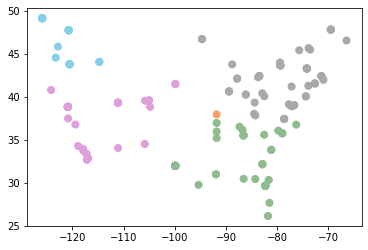

In [238]:
# location women us
mask = (df_women['longitude'] >= -135) & (df_women['longitude'] <= -60) & (df_women['latitude'] >= 25) & (df_women['latitude'] <= 60) #& (df_women['age'] <= 34) & (df_women['rank'] <= 50)

l = df_women.loc[mask]

df_women_us=l.loc[:,['rank','latitude','longitude']]

X_w_us = scale(df_women_us)

num_clusters = 5

color_theme = np.array(['darkgray','plum', 'darkseagreen', 'sandybrown', 'skyblue', 'khaki', 'mediumpurple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen', 'teal'])

clustering = KMeans(n_clusters=num_clusters, random_state=5)

clustering.fit(X_w_us)

df_women_us['cluster_label'] = kmeans.fit_predict(df_women_us[df_women_us.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(df_women_us[df_women_us.columns[1:3]]) # Labels of each point

df_women_us.head(10)

plt.scatter(x=df_women_us['longitude'],y=df_women_us['latitude'],c=color_theme[clustering.labels_],s=50)

# Clustering - Male Athletes

In [250]:
# All men clustering setups
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(X_m)
df.columns = ['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']

In [ ]:
# Elbow method for male athletes from the US
distortations = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_men_us)
    distortations[k] = kmeans.inertia_
plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Crossfit Men(US) dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

### Pullups & Fran (All Age Groups)

Text(0.5, 1.0, 'K-Means Classification Run5k')

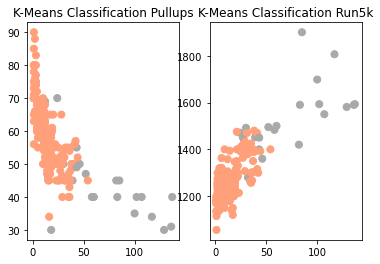

In [252]:
# Pullups
color_theme = np.array(['darkgray','lightsalmon', 'blue'])

plt.subplot(1,2,1)
plt.scatter(x=df_men['rank'],y=df_men['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups')

# Run 5k
plt.subplot(1,2,2)
plt.scatter(x=df_men['rank'],y=df_men['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')

## Aggregate by age groups

#### Age Group 18 - 34

In [253]:
# Aggregation
mask = (df_men['age'] >= 18) & (df_men['age'] <= 34)
df2 = df_men.loc[mask]
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)

KMeans(n_clusters=2, random_state=5)

Text(0.5, 1.0, 'K-Means Classification Run5k')

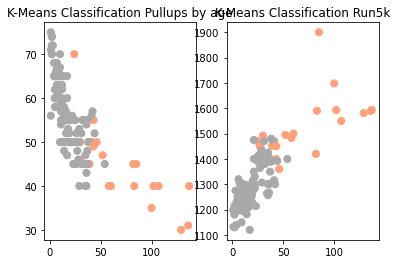

In [260]:
# Pullups
plt.subplot(1,2,1)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

# Run5k
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')

Text(0.5, 1.0, 'K-Means Classification Fran')

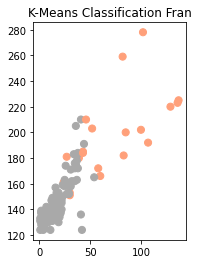

In [261]:
plt.subplot(1,2,1)
plt.scatter(x=df2['rank'],y=df2['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Fran')

#### Age Group 35 - 39

In [265]:
# Aggregation
mask = (df_men['age'] >= 35) & (df_men['age'] <= 39)
df2 = df.loc[mask]
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)

KMeans(n_clusters=2, random_state=5)

Text(0.5, 1.0, 'K-Means Classification run5k by age')

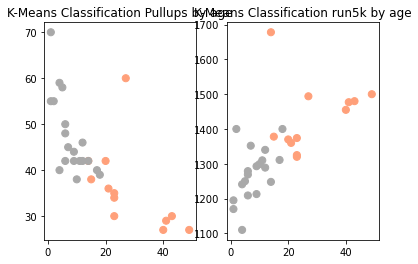

In [269]:
# Pullups
plt.subplot(1,2,1)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

# Run 5k
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification run5k by age')

Text(0.5, 1.0, 'K-Means Classification fran by age')

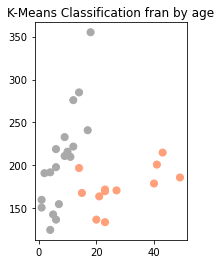

In [270]:
# fran
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification fran by age')

#### Age Group 40 - 44

In [271]:
mask = (df_men['age'] >= 40) & (df_men['age'] <= 44)
df2 = df.loc[mask]
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)

KMeans(n_clusters=2, random_state=5)

Text(0.5, 1.0, 'K-Means Classification run5k by age')

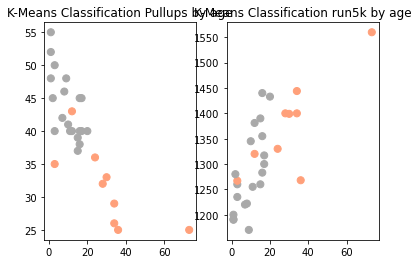

In [272]:
# Pullups
plt.subplot(1,2,1)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

# Run 5k
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification run5k by age')

Text(0.5, 1.0, 'K-Means Classification fran by age')

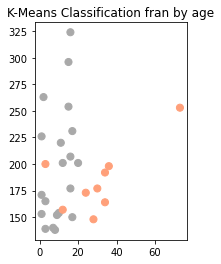

In [273]:
# Fran
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification fran by age')

#### Age Group 45 - 49

In [279]:
mask = (df_men['age'] >= 45) & (df_men['age'] <= 49)
df2 = df.loc[mask]
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)

KMeans(n_clusters=2, random_state=5)

Text(0.5, 1.0, 'K-Means Classification Run5k by age')

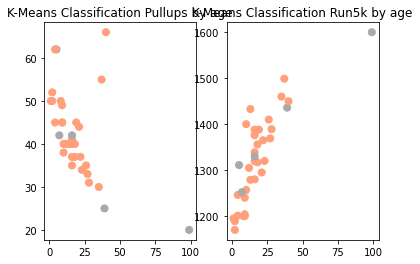

In [280]:
plt.subplot(1,2,1)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k by age')

Text(0.5, 1.0, 'K-Means Classification fran by age')

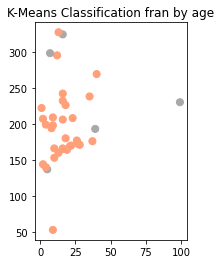

In [281]:
plt.subplot(1,2,1)
plt.scatter(x=df2['rank'],y=df2['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification fran by age')

# Clustering - Female Athletes

In [284]:
# All women clustering setups
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(X_w)
df.columns = ['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']

Text(0.5, 1.0, 'K-Means Classification Run5k')

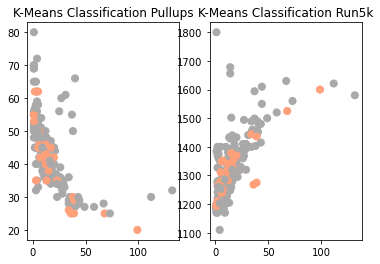

In [286]:
# Pullups
color_theme = np.array(['darkgray','lightsalmon', 'blue'])

plt.subplot(1,2,1)
plt.scatter(x=df_women['rank'],y=df_women['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups')

# Run 5k
plt.subplot(1,2,2)
plt.scatter(x=df_women['rank'],y=df_women['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')

Text(0.5, 1.0, 'K-Means Classification Run5k')

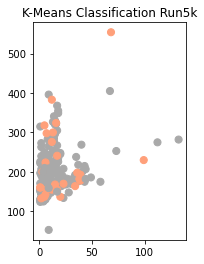

In [287]:
# Fran
plt.subplot(1,2,1)
plt.scatter(x=df_women['rank'],y=df_women['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')

## Aggregate by age groups

#### Age Group 18 - 34

In [289]:
# Aggregation
mask = (df_women['age'] >= 18) & (df_women['age'] <= 34)
df2 = df_women.loc[mask]
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)

KMeans(n_clusters=2, random_state=5)

Text(0.5, 1.0, 'K-Means Classification Run5k')

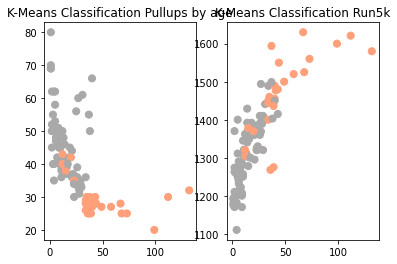

In [290]:
# Pullups
plt.subplot(1,2,1)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

# Run5k
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')

Text(0.5, 1.0, 'K-Means Classification Pullups by age')

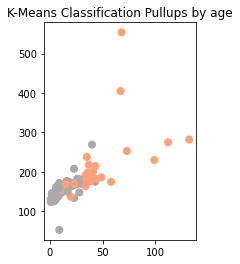

In [293]:
# Fran
plt.subplot(1,2,1)
plt.scatter(x=df2['rank'],y=df2['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

#### Age Group 35 - 39

In [294]:
# Aggregation
mask = (df_women['age'] >= 35) & (df_women['age'] <= 39)
df2 = df_women.loc[mask]
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)

KMeans(n_clusters=2, random_state=5)

Text(0.5, 1.0, 'K-Means Classification Run5k')

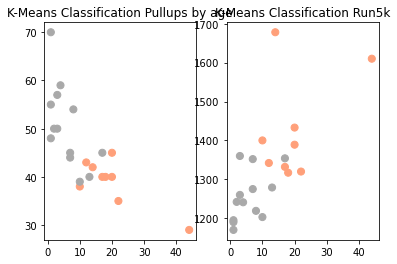

In [295]:
# Pullups
plt.subplot(1,2,1)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

# Run5k
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')

Text(0.5, 1.0, 'K-Means Classification Fran by age')

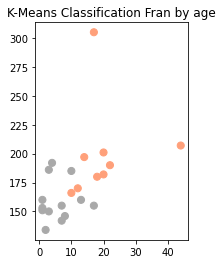

In [297]:
# Fran
plt.subplot(1,2,1)
plt.scatter(x=df2['rank'],y=df2['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Fran by age')

#### Age Group 40 - 44

In [299]:
# Aggregation
mask = (df_women['age'] >= 40) & (df_women['age'] <= 44)
df2 = df_women.loc[mask]
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)

KMeans(n_clusters=2, random_state=5)

Text(0.5, 1.0, 'K-Means Classification Run5k')

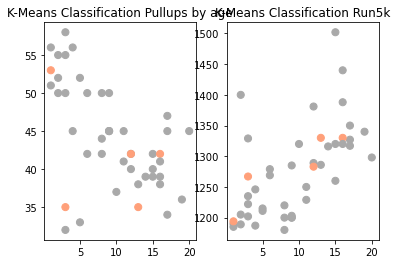

In [300]:
# Pullups
plt.subplot(1,2,1)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

# Run5k
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')

Text(0.5, 1.0, 'K-Means Classification Fran by age')

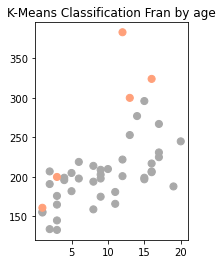

In [301]:
# Fran
plt.subplot(1,2,1)
plt.scatter(x=df2['rank'],y=df2['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Fran by age')

#### Age Group 45 - 49

In [302]:
# Aggregation
mask = (df_women['age'] >= 45) & (df_women['age'] <= 49)
df2 = df_women.loc[mask]
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)

KMeans(n_clusters=2, random_state=5)

Text(0.5, 1.0, 'K-Means Classification Run5k')

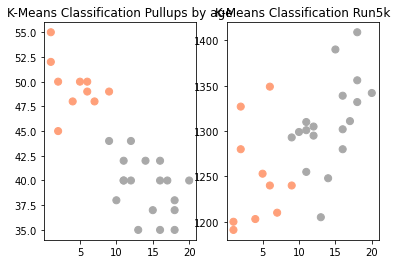

In [303]:
# Pullups
plt.subplot(1,2,1)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

# Run5k
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')

Text(0.5, 1.0, 'K-Means Classification Run5k')

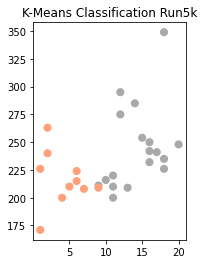

In [304]:
# Run5k
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')